# Titenic Survival Data  

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Data Collection, Cleaning and Analysis

In [3]:
#Data Collection
survival = pd.read_csv("https://raw.githubusercontent.com/training-ml/Files/main/titanic_train.csv")

In [4]:
#first five rows
survival.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
survival.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    int64  
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          714 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Cabin        204 non-null    object 
 12  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [6]:
survival.shape

(891, 13)

In [7]:
# null values
survival.isnull().sum() # missing value in age, cabin and embarked coloumn

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Drop cabin coloumn as many values are missing
survival.drop('Cabin',inplace= True, axis=1)

In [9]:
survival.head(5)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [10]:
# inputing missing values in age and embarked coloumn

survival['Age'].fillna(survival['Age'].mean(), inplace= True)

In [11]:
survival.head(11)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
5,5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q
6,6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S
7,7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S
8,8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S
9,9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C


In [12]:
survival['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
survival['Embarked'].fillna('S', inplace= True)
survival.head(11)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
5,5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q
6,6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S
7,7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S
8,8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S
9,9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C


In [14]:
survival.isnull().sum() #No missing values

Unnamed: 0     0
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
survival.describe()

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,445.000000,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,445.000000,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,667.500000,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,890.000000,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Survived', ylabel='count'>

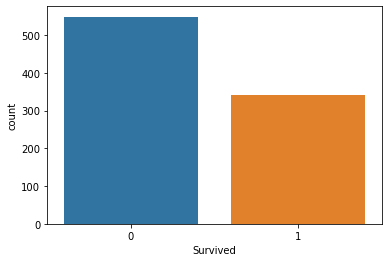

In [16]:
#Data Analysis
sns.countplot(x='Survived', data= survival)

<AxesSubplot:xlabel='Survived', ylabel='count'>

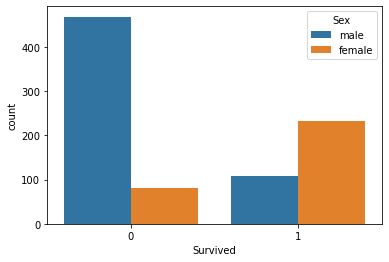

In [17]:
sns.countplot(x='Survived', data= survival, hue='Sex')

In [18]:
survival.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    int64  
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          891 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [19]:
gender=pd.get_dummies(survival['Sex'],drop_first= True) # Sex coloumn to dummies numerical values

In [20]:
survival['Gender']= gender

In [21]:
survival.head(11)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,0
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,0
4,4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1
5,5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q,1
6,6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,1
7,7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S,1
8,8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S,0
9,9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,0


In [22]:
survival['Family'] = survival['SibSp'] + survival['Parch']

In [23]:
survival.head(11)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender,Family
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1,1
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,0,1
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,0
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,0,1
4,4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1,0
5,5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q,1,0
6,6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,1,0
7,7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S,1,4
8,8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S,0,2
9,9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,0,1


In [24]:
survival.drop(columns="Unnamed: 0",inplace=True)
survival.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0


In [25]:
survival.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Gender       891 non-null    uint8  
 12  Family       891 non-null    int64  
dtypes: float64(2), int64(6), object(4), uint8(1)
memory usage: 84.5+ KB


### Preparing data for model building

In [26]:
#Seperating Features and Labels
X = survival[['Pclass','Age','Family','Fare','Gender']] # selecting only neccesary coloumns
y = survival['Survived']

In [27]:
X.head()

,Pclass,Age,Family,Fare,Gender
0,3,22.0,1,7.2500,1
1,1,38.0,1,71.2833,0
2,3,26.0,0,7.9250,0
3,1,35.0,1,53.1000,0
4,3,35.0,0,8.0500,1


In [28]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### Data Standardization

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

In [31]:
scaler.fit(X)

StandardScaler()

In [32]:
standardized_data=scaler.transform(X)

In [33]:
print(standardized_data)

[[ 0.82737724 -0.5924806   0.05915988 -0.50244517  0.73769513]
 [-1.56610693  0.63878901  0.05915988  0.78684529 -1.35557354]
 [ 0.82737724 -0.2846632  -0.56097483 -0.48885426 -1.35557354]
 ...
 [ 0.82737724  0.          1.29942929 -0.17626324 -1.35557354]
 [-1.56610693 -0.2846632  -0.56097483 -0.04438104  0.73769513]
 [ 0.82737724  0.17706291 -0.56097483 -0.49237783  0.73769513]]


In [34]:
X=standardized_data
y = survival['Survived']
print(X)
print(y)

[[ 0.82737724 -0.5924806   0.05915988 -0.50244517  0.73769513]
 [-1.56610693  0.63878901  0.05915988  0.78684529 -1.35557354]
 [ 0.82737724 -0.2846632  -0.56097483 -0.48885426 -1.35557354]
 ...
 [ 0.82737724  0.          1.29942929 -0.17626324 -1.35557354]
 [-1.56610693 -0.2846632  -0.56097483 -0.04438104  0.73769513]
 [ 0.82737724  0.17706291 -0.56097483 -0.49237783  0.73769513]]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


# Train Test Split

In [35]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state= 19)

In [36]:
print(X.shape, X_train.shape, X_test.shape)

(891, 5) (668, 5) (223, 5)


### Training the model

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
lr=LogisticRegression()

In [39]:
lr.fit(X_train,y_train)

LogisticRegression()

### Model Evaluation

In [40]:
#accuracy score of the training data
X_train_prediction = lr.predict(X_train)
training_data_accuracy= accuracy_score(X_train_prediction, y_train)

In [41]:
print("Accuracy score of the training data is ", training_data_accuracy)

Accuracy score of the training data is  0.7919161676646707


In [42]:
#accuracy score 0f the test data
X_test_prediction = lr.predict(X_test)
test_data_accuracy= accuracy_score(X_test_prediction,y_test)

print("Accuracy score of the test data is ", test_data_accuracy)

Accuracy score of the test data is  0.8251121076233184


In [43]:
import pickle

In [44]:
filename= 'Titanic survival prediction'
saved_model = (filename)
pickle.dump(lr, open(filename,'wb'))